In [94]:
from GeneralLinearModel import GeneralLinearModel
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, metrics
import numpy as np

To test the viability of the general linear model, we can see how it performs against sklearn's linear model for regression and logistic regression model for classification.  We can also test for poison regression.  Sklearn is of course expected to perform better considering it's a highly refined, perfesional software package, but if it performs with good accuracy, it can still be a good indication of viability.  

For linear regression, we can look at happieness data and see if we can create a model that will predict a country's happiness from social metrics.  We can perhaps pull feature importance to see what social metrics will lead to greater happiness scores.

In [95]:
happiness_data = pd.read_csv("2019.csv")

In [96]:
happiness_data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [97]:
happiness_data_clean = happiness_data.drop(columns=["Overall rank", "Country or region"])

In [98]:
happiness_train, happiness_test = model_selection.train_test_split(happiness_data_clean, train_size = 70, test_size = 30)

In [99]:
happiness_test_target = happiness_test["Score"]
happiness_test = happiness_test.drop(columns = ["Score"])

In [100]:
happinessGLM = GeneralLinearModel(happiness_data_clean, "linear", "Score")

In [101]:
happiness_test.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
147,1.041,1.145,0.538,0.455,0.025,0.100
99,0.446,1.226,0.677,0.439,0.285,0.089
43,1.258,1.523,0.953,0.564,0.144,0.057
39,1.206,1.438,0.884,0.483,0.117,0.050
44,0.694,1.325,0.835,0.435,0.200,0.127


In [102]:
predictions = happinessGLM.predict(happiness_test)

In [103]:
dict(zip(happiness_train.drop(columns=["Score"]).columns,happinessGLM.parameters))

{'GDP per capita': 0.24211644860462064,
 'Social support': 2.290586833449479,
 'Healthy life expectancy': 1.6648386150024064,
 'Freedom to make life choices': 1.7489125903280223,
 'Generosity': 1.9910136320568372,
 'Perceptions of corruption': 0.7550614070692561}

In [104]:
happiness_data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [105]:
linear_regressor = linear_model.LinearRegression()
happiness_linear_model = linear_regressor.fit(happiness_train.drop(columns=["Score"]), happiness_train["Score"])
sklearn_predictions = happiness_linear_model.predict(happiness_test)

In [106]:
dict(zip(happiness_train.drop(columns=["Score"]).columns,happiness_linear_model.coef_))

{'GDP per capita': 0.8459844060441608,
 'Social support': 1.194388511269541,
 'Healthy life expectancy': 1.002124329530841,
 'Freedom to make life choices': 1.6277128198334347,
 'Generosity': -0.4303337277503944,
 'Perceptions of corruption': 1.3923479144508095}

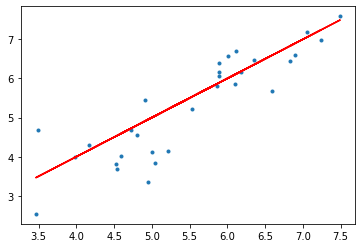

In [107]:
plt.plot(happiness_test_target, predictions,".")
plt.plot(happiness_test_target,happiness_test_target,"r-")

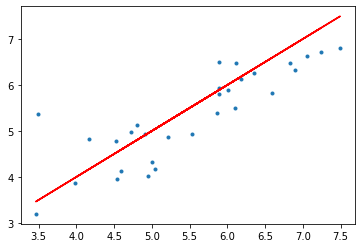

In [108]:
plt.plot(happiness_test_target, sklearn_predictions,".")
plt.plot(happiness_test_target,happiness_test_target, "r-")


In [109]:
np.sqrt(metrics.mean_squared_error(happiness_test_target, predictions))

0.6437762752850951

In [110]:
np.sqrt(metrics.mean_squared_error(happiness_test_target, sklearn_predictions))

0.5889663980411481

After running a few times, it seems like while sklearn is more stable, the genearl linear model sometimes performs better, but also sometimes performs worse with rmse